In [ ]:
import sys
sys.path.append("/proj/gaia-climate/team/kirill/gaia-surrogate")

In [ ]:
from gaia.models import FcnBaseline

In [ ]:
13/23

### memory footprint

In [ ]:
ins  = 164
outs = 54
def get_memory_footprint(l,h, b):
    model = FcnBaseline(input_size=ins, num_layers=l, hidden_size=h,output_size=outs)
    trainable_params = sum([p.numel() for p in model.parameters() if p.requires_grad])
    non_trainable_params = sum([p.numel() for p in model.parameters() if p.requires_grad])
    activations = l*(4*h)
    grads = trainable_params
    optimizer_states = grads*2
    
    p = trainable_params + non_trainable_params + grads + optimizer_states
    return (p+4*activations*b)/(10**9)

In [ ]:
import pandas as pd

In [ ]:
num_layers = [3,5,7,14,21]
hidden_size = [128,256,512,1024,2048]

df = []

for l in num_layers:
    for h in hidden_size:
        for b in [2,4,8,16,24]:
            df.append((l,h,b,get_memory_footprint(l, h, b*96*144)))

In [ ]:
df = pd.DataFrame(df,columns=["layers","size","batch","memory"]).sort_values("memory")

In [ ]:
df.query("memory<=20").sort_values("batch", ascending = False).drop_duplicates(["layers","size"]).sort_values(["layers","size"]).reset_index(drop = True).to_csv("memory_size.csv",index = False)

In [ ]:
ins  = 164
outs = 54
def compute_memory_footprint(l,h):
    num_params_diff_params =  (l-2)*(h**2 + h) + h*(64+1) + h*(164+1) + (h*2)*(l-1)
    num_non_diff_params = ins

In [ ]:
compute_num_params(21,2048)/compute_num_params(7,512)

In [ ]:
from math import log,log10, log2
log2(56)

In [ ]:
memory_size = pd.read_csv("memory_size.csv").set_index(["layers","size"])


In [ ]:
memory_size.loc[(3,512)]

### get data and plot

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
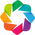

2024-04-17 15:28:51,530 - gaia.gaia.config - INFO - no dataset provided ... you must be loading it from an existing model


In [1]:
import sys
sys.path.append("/proj/gaia-climate/team/kirill/gaia-surrogate")
from gaia.models import TrainingModel
from gaia.training import get_checkpoint_file, load_hparams_file
import glob,os
import pandas as pd

In [2]:
model_dirs = [m for m in glob.glob("lightning_logs/*")]#if os.path.exists(os.path.join(m,"test_results.json"))]
data = []

fields = ["hidden_size","num_layers","model_type"]


data = []

for m in model_dirs:
    
    model = TrainingModel.load_from_checkpoint(get_checkpoint_file(m), map_location="cpu")
    
    num_params = sum([p.numel() for p in model.parameters()])
    
    test_file = os.path.join(m,"test_results_cam4_fixed.json")
    test_results = pd.read_json(test_file, orient = "records").iloc[0]
    test_results.loc["num_params"]=num_params
    test_results.loc["hidden_size"] = model.model.hidden_size
    test_results.loc["num_layers"] = model.model.num_layers
    
    data.append(test_results)
    
#     params = load_hparams_file(m)
#     if params:
#         test_file = os.path.join(m,"test_results.json")
#         test_results = pd.read_json(test_file, orient = "records").iloc[0]
#         for f in fields:
#             test_results[f] = params["model_config"][f]
        
#         # test_results["ignore_input_variables"] = params.get("ignore_input_variables")
#         # test_results["memory_variables"] = params.get("memory_variables")
#         data.append(test_results.to_frame().T)
        
data = pd.concat(data,axis=1,ignore_index=True).T

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_0/checkpoints/epoch=99-step=98600.ckpt`


2024-04-17 15:29:09,199 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:09,418 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:09,918 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:10,416 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_1/checkpoints/epoch=99-step=49300.ckpt`


2024-04-17 15:29:14,372 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:14,373 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:14,374 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:14,694 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_2/checkpoints/epoch=99-step=24700.ckpt`


2024-04-17 15:29:16,619 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:16,620 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:16,621 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:16,701 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_3/checkpoints/epoch=99-step=98600.ckpt`


2024-04-17 15:29:23,469 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:23,470 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:23,471 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:23,755 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_4/checkpoints/epoch=99-step=8300.ckpt`


2024-04-17 15:29:24,550 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:24,551 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:24,551 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:24,558 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_5/checkpoints/epoch=99-step=24700.ckpt`


2024-04-17 15:29:25,668 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:25,669 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:25,670 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:25,698 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_6/checkpoints/epoch=99-step=49300.ckpt`


2024-04-17 15:29:28,396 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:28,397 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:28,397 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:28,522 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_7/checkpoints/epoch=98-step=8217.ckpt`


2024-04-17 15:29:29,311 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:29,312 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:29,313 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:29,326 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_8/checkpoints/epoch=99-step=8300.ckpt`


2024-04-17 15:29:29,950 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:29,951 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:29,951 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:29,955 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_9/checkpoints/epoch=99-step=24700.ckpt`


2024-04-17 15:29:30,910 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:30,911 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:30,912 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:30,984 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_10/checkpoints/epoch=99-step=12400.ckpt`


2024-04-17 15:29:31,975 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:31,976 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:31,976 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:31,993 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_11/checkpoints/epoch=99-step=12400.ckpt`


2024-04-17 15:29:33,235 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:33,235 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:33,236 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:33,258 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_12/checkpoints/epoch=99-step=8300.ckpt`


2024-04-17 15:29:33,466 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:33,467 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:33,467 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:33,470 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_13/checkpoints/epoch=99-step=8300.ckpt`


2024-04-17 15:29:33,637 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:33,638 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:33,639 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:33,642 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_14/checkpoints/epoch=99-step=8300.ckpt`


2024-04-17 15:29:33,996 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:33,997 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:33,998 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:34,002 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_15/checkpoints/epoch=99-step=8300.ckpt`


2024-04-17 15:29:34,527 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:34,527 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:34,528 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:34,534 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_16/checkpoints/epoch=99-step=49300.ckpt`


2024-04-17 15:29:37,187 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:37,188 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:37,189 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:37,265 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_17/checkpoints/epoch=99-step=24700.ckpt`


2024-04-17 15:29:37,995 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:37,996 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:37,997 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:38,039 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_18/checkpoints/epoch=98-step=8217.ckpt`


2024-04-17 15:29:38,246 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:38,247 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:38,247 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:38,249 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_19/checkpoints/epoch=99-step=8300.ckpt`


2024-04-17 15:29:38,566 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:38,566 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:38,567 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:38,571 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_20/checkpoints/epoch=99-step=8300.ckpt`


2024-04-17 15:29:39,161 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:39,162 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:39,163 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:39,184 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_21/checkpoints/epoch=99-step=24700.ckpt`


2024-04-17 15:29:40,676 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:40,677 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:40,678 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:40,739 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_22/checkpoints/epoch=98-step=8217.ckpt`


2024-04-17 15:29:41,025 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:41,026 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:41,026 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:41,031 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_23/checkpoints/epoch=99-step=8300.ckpt`


2024-04-17 15:29:41,485 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:41,485 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:41,486 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:41,494 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

Lightning automatically upgraded your loaded checkpoint from v1.8.2 to v2.0.9.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file lightning_logs/version_24/checkpoints/epoch=99-step=8300.ckpt`


2024-04-17 15:29:41,584 - gaia.gaia.models - WARNING - no stats provided, assuming will be loaded later, initializing randomly
2024-04-17 15:29:41,584 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:41,585 - gaia.gaia.layers - WARNING - hardcoding min std threshold to 1e-10
2024-04-17 15:29:41,586 - gaia.gaia.models - INFO - using output weights [0.5500000715255737, 0.5500000715255737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.351999968290329, 0.3879999816417694, 0.42399996519088745, 0.4599999785423279, 0.4959999918937683, 0.531999945640564, 0.5679999589920044, 0.6039999723434448, 0.6399999856948853, 0.6759999990463257, 0.7120000123977661, 0.7480000257492065, 0.784000039100647, 0.8199999928474426, 0.8560000061988831, 0.8920000195503235, 0.9279999732971191, 0.9639999866485596, 1.0, 0.10000000149011612, 0.13600000739097595, 0.171999990940094, 0.20800000429153442, 0.24399998784065247, 0.2800000011920929, 0.31599998474121094, 0.351999968290329, 0.3879999816

In [3]:
data.columns = [c.replace("test_skill_ave_trunc_","").replace("test_skill_ave_clipped","test_skill") for c in data.columns]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
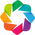

In [4]:
import holoviews as hv
hv.extension("bokeh")
import hvplot.pandas

In [22]:
p = data.sort_values("num_params").hvplot.line(x = "num_params", y = "test_skill",  by="hidden_size", xlabel = "number of parameters", group_label = "hidden size",ylabel = "test skill", logx = True, grid = True, padding = .1 ,line_width = .5)*\
    data.sort_values("num_params").hvplot.scatter(x = "num_params", y = "test_skill",  by="hidden_size",logx = True, padding = .1, group_label = "hidden size")*\
    data.query("hidden_size==128").hvplot.labels(x = "num_params", y = "test_skill", text = "num_layers",text_color = "black",group_label = "hidden size").opts(yoffset = .01, text_font_size = "10pt")
hv.save(p,"param_sweep.html")
p

:Overlay
   .NdOverlay.I  :NdOverlay   [hidden_size]
      :Curve   [num_params]   (test_skill)
   .NdOverlay.II :NdOverlay   [hidden_size]
      :Scatter   [num_params]   (test_skill)
   .Labels.I     :Labels   [num_params,test_skill]   (num_layers)